# Clustering Credit Card Users using K-means

The purpose of this project is to see and find the type of CC users. The type will be analyzed by user's characteristic and behaviour in using their CC.

### Preparation
In this part, we import, proceed the raw data until it is ready to use.

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

In [100]:
df = pd.read_csv('dataset-s1.csv')

In [101]:
df.shape

(8950, 18)

In [102]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [103]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In this project, I want to analyze the people according on their purchases, payments, minimum payments, frequency of purchases, and credit limit. Purchases, payments, and minimum payments are the total value, not quantity. The quantity is represented on the frequency attribute. The credit limit is the maximum limit a person can spend with their CC. The bigger the credit value, it means they have bigger balance the first time around.

In [104]:
df = df.drop(columns=['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                      'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                      'CASH_ADVANCE_TRX', 'PURCHASES_TRX',  'PRC_FULL_PAYMENT', 'TENURE'])
df.reset_index(drop=True, inplace=True)

Handle missing values.

In [105]:
df.isnull().sum()
df =df.dropna()

In [106]:
df_idcust = df['CUST_ID']

In [107]:
df = df.drop(columns=['CUST_ID','BALANCE'])
df.reset_index(drop=True, inplace=True)

#### Overal info of ready-dataframe

In [108]:
df.describe()

,PURCHASES,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1025.433874,0.496000,4522.091030,1784.478099,864.304943
std,2167.107984,0.401273,3659.240379,2909.810090,2372.566350
min,0.000000,0.000000,50.000000,0.049513,0.019163
25%,43.367500,0.083333,1600.000000,418.559237,169.163545
50%,375.405000,0.500000,3000.000000,896.675701,312.452292
75%,1145.980000,0.916667,6500.000000,1951.142090,825.496463
max,49039.570000,1.000000,30000.000000,50721.483360,76406.207520


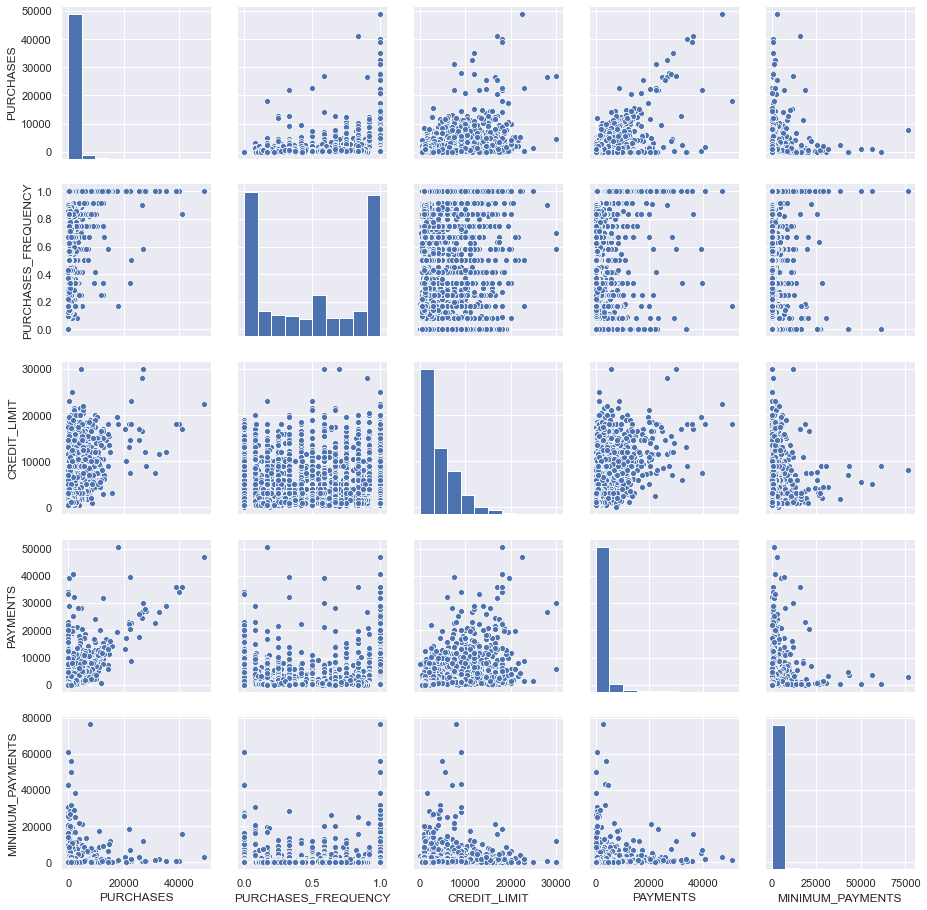

In [109]:
sns.pairplot(df)

### Clustering using K-means
I used the K-means this time with five cluster number. I tried more than 5 but turns out a few of the clusters are not really necessary and still can be grouped as one cluster. I tried less than 4 but it failed to capture a few characteristic. So I choose 5 as the final choice.

In [111]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

### Verification with Silhoutte Index

In [112]:
#for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(df)
    sum_of_squared_distances.append(k_means.inertia_)

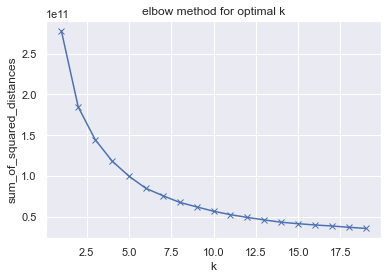

In [113]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [114]:
from sklearn.metrics import silhouette_score
silhoutte_score = []
K = range(2,10)
for n in K:
    clusterer = KMeans(n_clusters=n)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df, preds)
    silhoutte_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n, score))

For n_clusters = 2, silhouette score is 0.5257156102007619)
For n_clusters = 3, silhouette score is 0.4977005978852564)
For n_clusters = 4, silhouette score is 0.5058928345798617)
For n_clusters = 5, silhouette score is 0.43611825885405736)
For n_clusters = 6, silhouette score is 0.43916573714974605)
For n_clusters = 7, silhouette score is 0.45165884346292695)
For n_clusters = 8, silhouette score is 0.4512238576378589)
For n_clusters = 9, silhouette score is 0.348585084439739)


According to the silhouette index, the best one is 2. But for me, it is too small. We can't really get the information we wanted. So I still use n=5 because it is enough to represent the cluster. I'll describe and explain about it as the notebook goes on.

### PCA
Visualizing data with high dimension is hard. We have 5 dimensions, so we have to reduced it to 2 dimensions. It will make it easier to visualize and analyze. I choose to do it with PCA since it will give us the best principal components by its eigen values.

In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [116]:
pca = PCA(n_components = 2)
df['x'] = pca.fit_transform(df_scaled)[:,0]
df['y'] = pca.fit_transform(df_scaled)[:,1]

In [117]:
result_df = pd.DataFrame()

In [118]:

result_df['CUST_ID'] = df_idcust
result_df['cluster'] = y_kmeans
result_df['x'] = df['x']
result_df['y'] = df['y']

#### Overal information after clustering

In [119]:
result_df['cluster'].unique()

array([0, 2, 1, 3, 4])

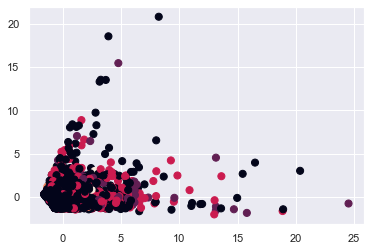

In [120]:
plt.scatter(result_df['x'], result_df['y'], c=y_kmeans, s=50)

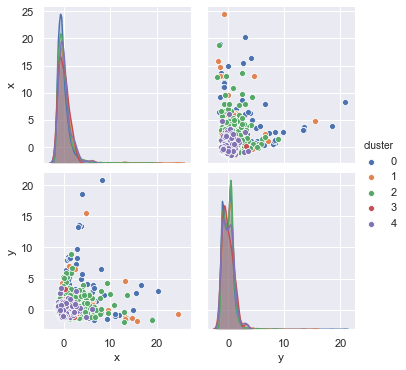

In [121]:
sns.pairplot( result_df, hue='cluster')

As we can see, there's 5 cluster from our data. Since we don't really know what are they represent, let's call them 0-4 first. To get clearer picture about the clusters, let's visualize the relation between attributes.

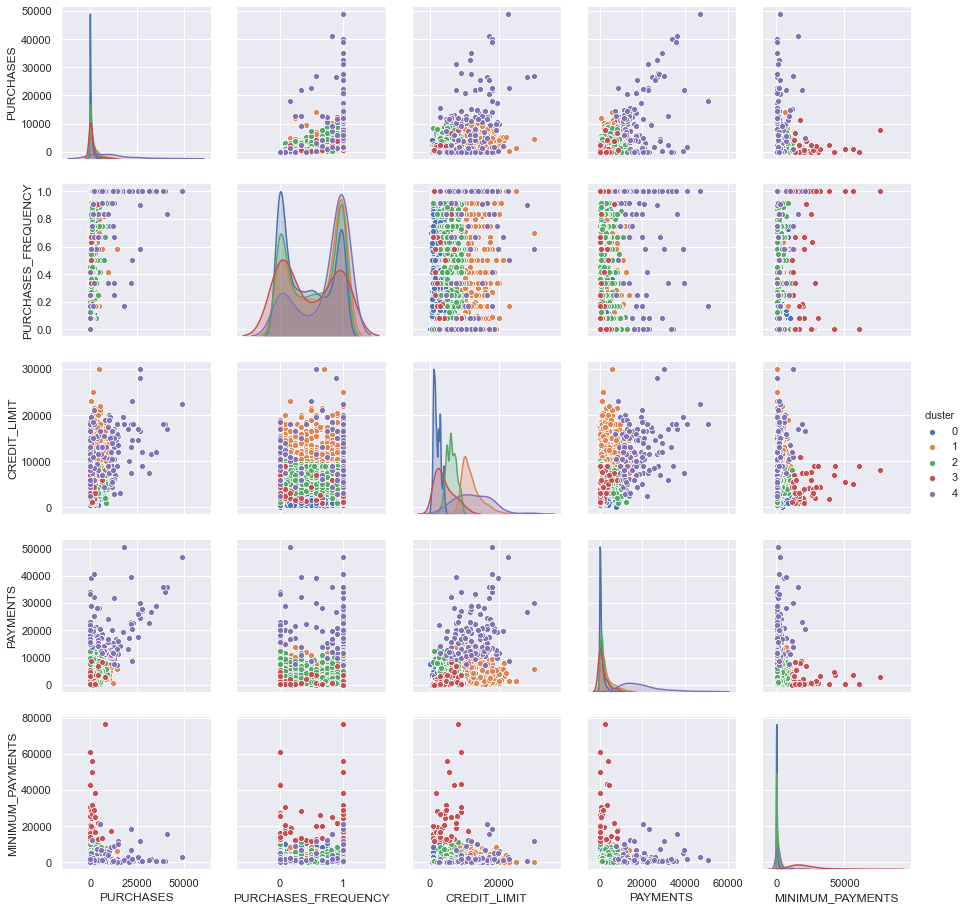

In [122]:
df['cluster'] = y_kmeans
cols=['PURCHASES', 'PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'cluster']
sns.pairplot( df[cols], hue='cluster')

# Insight & Analysis

After seeing the visualizations above, we can take a few insights from the clustering process.

There are 5 cluster that behave differently, i'll name them as the color which are orange, green, purple, red, and blue.

* The __blue__ are the __richest and the most spending-active people__. I say it the richest because they are the ones who has big credit limit (it means they have big balance from the first). These people also have high frequency of making purchases. They spend the most, they have the biggest nominal of purchases & payments in total. But the minimum payment of each purchase & payment not really matter for them.

* The __red__ are also the __upper-class people with medium spending activities__. Just like the blue, they are the ones with big credit limit. But they are not spending high on purchases and payments like the blue. They are not as frequent as the blue on making purchases.

* The __green__ are the kind of people who __love expensive stuffs__. They have the biggest minimum payments compared to the others. The bigger the credit limit, the bigger minimum payments they will make.

* The __orange__ are the __simple people__. They are the people with smallest credit limit, it means they don't really have big balance compared to the other. They not really spending much and not too frequent.

* The __purple__ are the __simple people with bigger spending.__ They are similar to the orange, but they have bigger credit limit and make bigger purchases & payments.

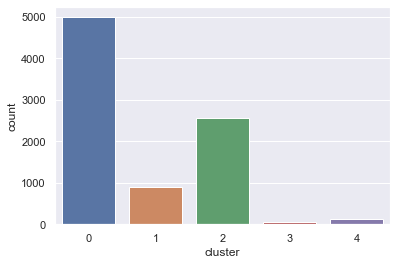

In [123]:
ax = sns.countplot(x="cluster",data=df)

We can see from the histogram above, the majority of CC users are the simple people. Then followed by the purple, red, blue and the least are the green.

So if the CC company want to make new policy or promo, its better to reach the medium to low credit limit class people since it is the biggest characteristic. But the company could make special treat to the red one since it has a pretty good number also and have more potential to spending.